# Clasificador
El objetivo consiste en crear un clasificador que indentifique si una persona es hombre o mujer a partir de caracteristicas como su largo de pelo, ancho y alto de la frente, labios, etc.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [146]:
df = pd.read_csv('gender_classification.csv')

In [147]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


<Axes: xlabel='gender', ylabel='count'>

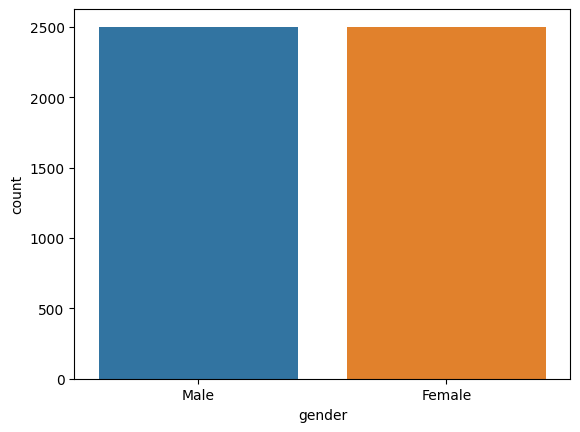

In [148]:
sns.countplot(data=df,x=df['gender'])

Vemos una distribución en las clases muy homogenea, por lo tanto no es necesario crear pesos en el clasificador

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


Inicialmente desarrollé el clasificador con 3 caracteristicas pero como era de esperarse, se desempeñaba muy mal, por lo tanto agregue otras más al modelo

In [150]:
#features = df[['long_hair','forehead_width_cm','forehead_height_cm']].values
features = df[['long_hair','forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin']].values

In [151]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

In [152]:
target = df[['gender']].values

In [153]:
x_train, x_test, y_train, y_test = train_test_split(features, target,test_size = 0.2,random_state = 6)

In [154]:
escalador = MinMaxScaler()

x_train_f = escalador.fit_transform(x_train)
x_test_f = escalador.fit_transform(x_test)

In [155]:
modelo = LogisticRegression()

In [156]:
modelo.fit(x_train_f,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [157]:
y_pred = modelo.predict(x_test_f)

In [158]:
y_test = y_test.reshape(1,-1)[0]

In [159]:
pd.DataFrame({'y_pred':y_pred, 'y_test':y_test})

,y_pred,y_test
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
996,0,1
997,0,0
998,1,1
999,0,0


In [160]:
confusion_matrix(y_test,y_pred)

array([[460,  25],
       [ 19, 497]])

El modelo se desempeña bastante bien para clasificar, evaluemos esto usando la técnica de validación cruzada

In [161]:
accuracy_score(y_test,y_pred)

0.9560439560439561

In [162]:
capacidad_real = cross_val_score(modelo,
                features,
                target.reshape(1,-1)[0],
                cv = 5)

In [163]:
capacidad_real.mean()

0.9576101898101896

La técnica de validación cruzada nos ayuda a tener una métrica más acertada, y no sobreestimar ni subestimar nuestro modelo

# Usando la técnica de Bagging

Esta técnica nos permite crear varios modelos a partir de un conjunto de datos, veamos cómo se hace

In [166]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

In [167]:
df = pd.read_csv('gender_classification.csv')

In [168]:
#features = df[['long_hair','forehead_width_cm','forehead_height_cm']].values
features = df[['long_hair','forehead_width_cm','forehead_height_cm','nose_wide','nose_long','lips_thin']].values

In [169]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})

In [170]:
target = df[['gender']].values

In [171]:
x_train, x_test, y_train, y_test = train_test_split(features, target,test_size = 0.2,random_state = 3)

In [172]:
escalador = MinMaxScaler()

x_train_f = escalador.fit_transform(x_train)
x_test_f = escalador.fit_transform(x_test)

In [173]:
modelo = LogisticRegression()
meta_modelo = BaggingClassifier(estimator=modelo,max_samples = 0.30,n_estimators=50).fit(x_train_f,y_train.reshape(1,-1)[0])

In [174]:
y_pred = meta_modelo.predict(x_test_f)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [175]:
pd.DataFrame({'y_test':y_test.reshape(1,-1)[0],'y_pred':y_pred})

,y_test,y_pred
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
996,0,0
997,1,1
998,1,1
999,1,1


In [176]:
confusion_matrix(y_test,y_pred)

array([[482,  22],
       [ 19, 478]])

In [177]:
accuracy_score(y_test,y_pred)

0.9590409590409591

El accuracy_score mejora solo un poco pero es una mejora, tenemos varios modelos entrenados con nuestro conjunto de datos dando sus opiniones y tomando la opinión promedio